In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('petrol_consumption.csv')

In [9]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [11]:
df.corrwith(df['Petrol_Consumption'])

Petrol_tax                     -0.451280
Average_income                 -0.244862
Paved_Highways                  0.019042
Population_Driver_licence(%)    0.698965
Petrol_Consumption              1.000000
dtype: float64

##### Separate the input and output variables

In [15]:
x = df.drop('Petrol_Consumption', axis=1)

In [21]:
y = df['Petrol_Consumption']

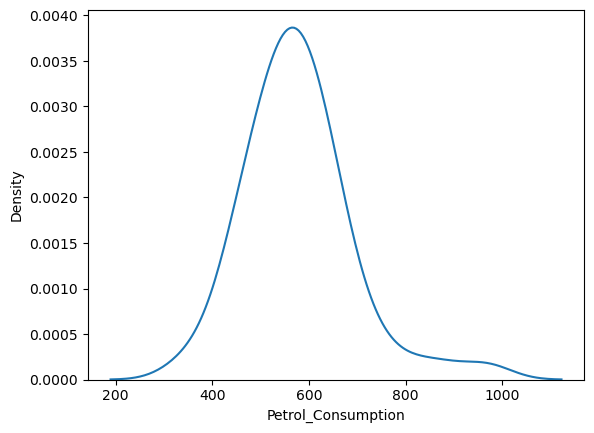

In [25]:
sns.kdeplot(y);

<Axes: xlabel='Average_income', ylabel='Density'>

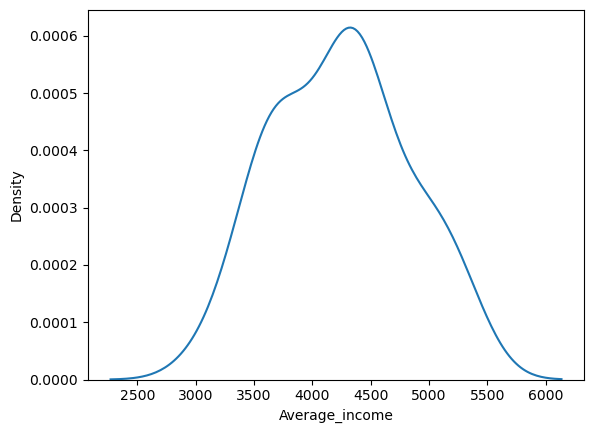

In [30]:
sns.kdeplot(x['Average_income'])

<Axes: xlabel='Petrol_tax', ylabel='Density'>

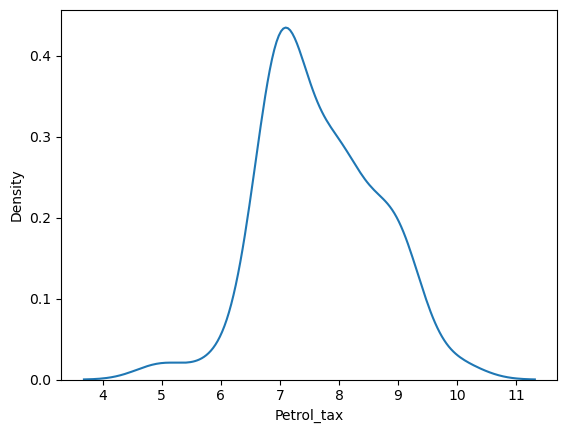

In [32]:
sns.kdeplot(x['Petrol_tax'])

<Axes: xlabel='Paved_Highways', ylabel='Density'>

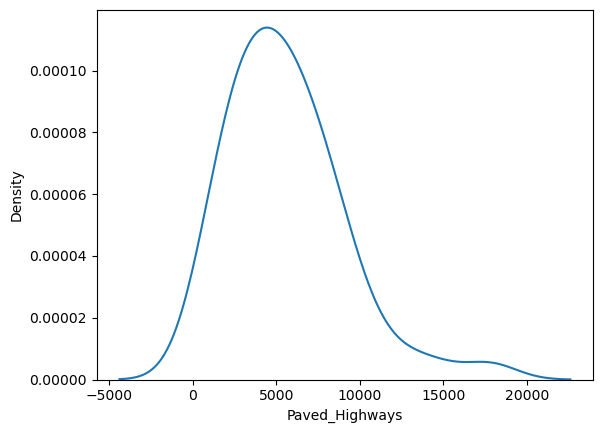

In [34]:
sns.kdeplot(x['Paved_Highways'])

<Axes: xlabel='Population_Driver_licence(%)', ylabel='Density'>

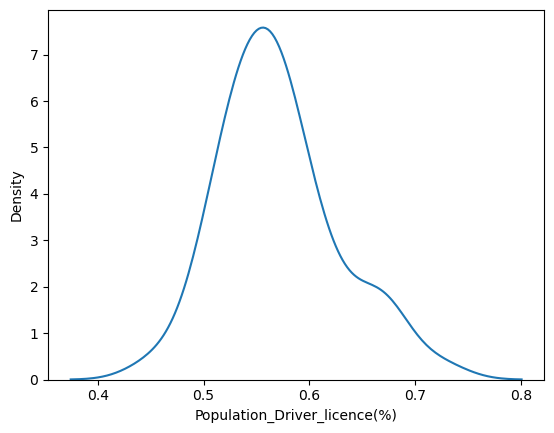

In [36]:
sns.kdeplot(x['Population_Driver_licence(%)'])

In [38]:
x.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
count,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333
std,0.950770,573.623768,3491.507166,0.055470
min,5.000000,3063.000000,431.000000,0.451000
25%,7.000000,3739.000000,3110.250000,0.529750
50%,7.500000,4298.000000,4735.500000,0.564500
75%,8.125000,4578.750000,7156.000000,0.595250
max,10.000000,5342.000000,17782.000000,0.724000


In [40]:
x.shape

(48, 4)

Cross Validation

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [49]:
x_train.shape

(36, 4)

In [53]:
x_test.shape

(12, 4)

#### Build the model

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
reg = DecisionTreeRegressor(random_state=0)

In [60]:
reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [64]:
from sklearn.tree import plot_tree

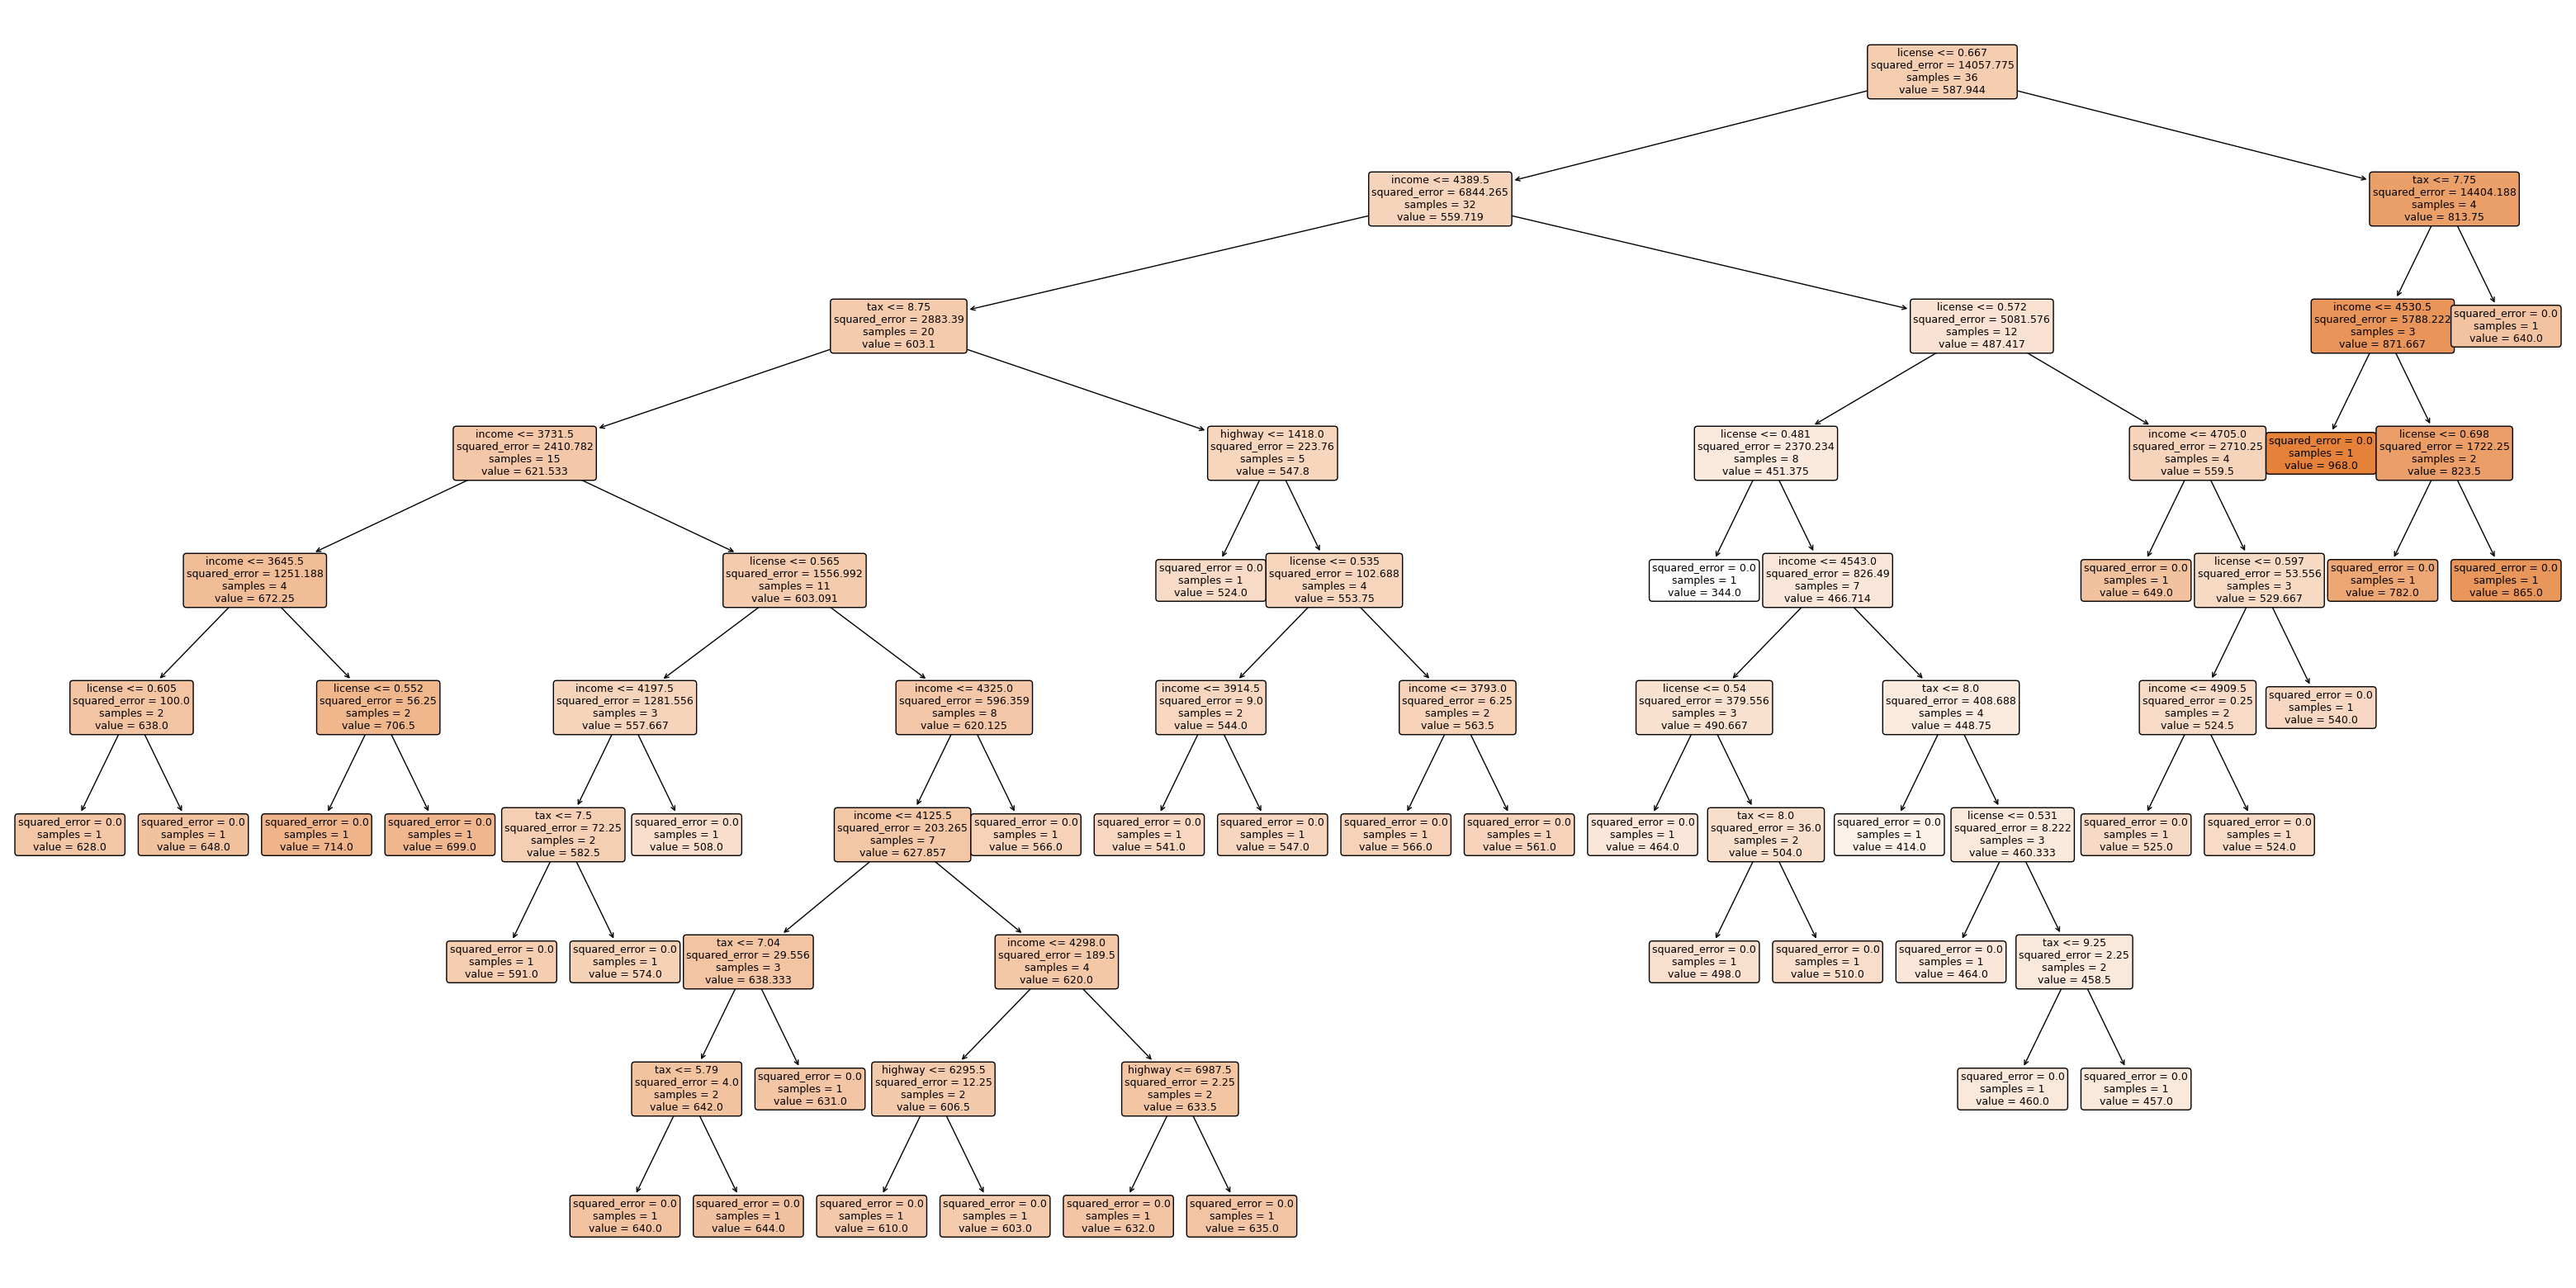

In [99]:
plt.figure(figsize=(40,20))
plot_tree(reg, fontsize=9, filled=True, rounded=True,
         feature_names=['tax','income','highway','license']);

#### Performance

In [83]:
y_pred = reg.predict(x_test)

In [89]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

In [91]:
result

,actual,predicted
29,534,541.0
4,410,498.0
26,577,628.0
30,571,628.0
32,577,628.0
37,704,644.0
34,487,628.0
40,587,649.0
7,467,414.0
10,580,464.0


In [111]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(result['actual'], result['predicted'])

68.08333333333333

In [109]:
mean_absolute_percentage_error(result['actual'], result['predicted'])

0.1294003614849453

In [113]:
new = pd.DataFrame(data=[[9.00, 4258, 4686, 0.517],
                         [7.5, 5126, 14186, 0.525]],
                   columns=x.columns)

In [115]:
new

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,4258,4686,0.517
1,7.5,5126,14186,0.525


In [117]:
reg.predict(new)

array([547., 414.])